In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"5901cffd98e3fce7636781e4b883dad9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mrmorj/dataset-of-songs-in-spotify

  0% 0.00/3.06M [00:00<?, ?B/s]
100% 3.06M/3.06M [00:00<00:00, 103MB/s]


In [ ]:
!unzip '/content/dataset-of-songs-in-spotify.zip' -d '/content/'

Archive:  /content/dataset-of-songs-in-spotify.zip
  inflating: /content/genres_v2.csv  
  inflating: /content/playlists.csv  


In [ ]:
data = pd.read_csv('/content/genres_v2.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


danceability  energy  ...  Unnamed: 0                        title
0             0.831   0.814  ...         NaN                          NaN
1             0.719   0.493  ...         NaN                          NaN
2             0.850   0.893  ...         NaN                          NaN
3             0.476   0.781  ...         NaN                          NaN
4             0.798   0.624  ...         NaN                          NaN
...             ...     ...  ...         ...                          ...
42300         0.528   0.693  ...     20995.0           Euphoric Hardstyle
42301         0.517   0.768  ...     20996.0  Greatest Hardstyle Playlist
42302         0.361   0.821  ...     20997.0       Best of Hardstyle 2020
42303         0.477   0.921  ...     20998.0           Euphoric Hardstyle
42304         0.529   0.945  ...     20999.0       Best of Hardstyle 2020

[42305 rows x 22 columns]

# **Cleaning**

## **first works**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


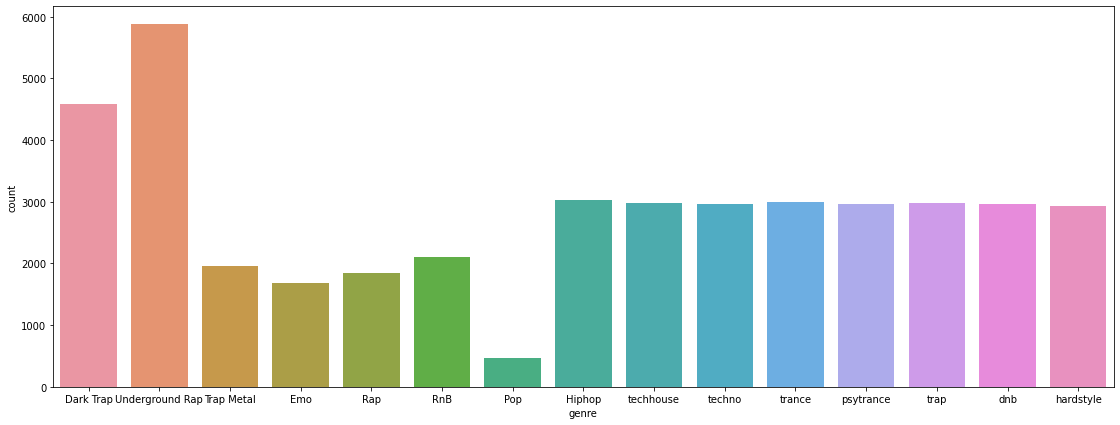

In [ ]:
plt.figure(figsize=(19,7))
sns.countplot(data['genre'])

In [ ]:
data = data.drop(['Unnamed: 0'],axis=1)
data

danceability  ...                        title
0             0.831  ...                          NaN
1             0.719  ...                          NaN
2             0.850  ...                          NaN
3             0.476  ...                          NaN
4             0.798  ...                          NaN
...             ...  ...                          ...
42300         0.528  ...           Euphoric Hardstyle
42301         0.517  ...  Greatest Hardstyle Playlist
42302         0.361  ...       Best of Hardstyle 2020
42303         0.477  ...           Euphoric Hardstyle
42304         0.529  ...       Best of Hardstyle 2020

[42305 rows x 21 columns]

In [ ]:
data.iloc[40000]['genre']

'hardstyle'

In [ ]:
#for i in range (len(data)):
#  if (data.iloc[i]['genre'] == 'Pop' or data.iloc[i]['genre'] == 'Emo') :
#    data.iloc[i]['genre'] = 'others'

In [ ]:
data

danceability  ...                        title
0             0.831  ...                          NaN
1             0.719  ...                          NaN
2             0.850  ...                          NaN
3             0.476  ...                          NaN
4             0.798  ...                          NaN
...             ...  ...                          ...
42300         0.528  ...           Euphoric Hardstyle
42301         0.517  ...  Greatest Hardstyle Playlist
42302         0.361  ...       Best of Hardstyle 2020
42303         0.477  ...           Euphoric Hardstyle
42304         0.529  ...       Best of Hardstyle 2020

[42305 rows x 21 columns]

In [ ]:
data_cluster = data.drop(['type','id','uri','track_href','analysis_url','song_name','title'],axis=1)
data_cluster

danceability  energy  key  ...  duration_ms  time_signature      genre
0             0.831   0.814    2  ...       124539               4  Dark Trap
1             0.719   0.493    8  ...       224427               4  Dark Trap
2             0.850   0.893    5  ...        98821               4  Dark Trap
3             0.476   0.781    0  ...       123661               3  Dark Trap
4             0.798   0.624    2  ...       123298               4  Dark Trap
...             ...     ...  ...  ...          ...             ...        ...
42300         0.528   0.693    4  ...       269208               4  hardstyle
42301         0.517   0.768    0  ...       210112               4  hardstyle
42302         0.361   0.821    8  ...       234823               4  hardstyle
42303         0.477   0.921    6  ...       323200               4  hardstyle
42304         0.529   0.945    9  ...       162161               4  hardstyle

[42305 rows x 14 columns]

In [ ]:
data_nogenre = data_cluster.drop(['genre'],axis=1)
data_nogenre

danceability  energy  key  ...    tempo  duration_ms  time_signature
0             0.831   0.814    2  ...  156.985       124539               4
1             0.719   0.493    8  ...  115.080       224427               4
2             0.850   0.893    5  ...  218.050        98821               4
3             0.476   0.781    0  ...  186.948       123661               3
4             0.798   0.624    2  ...  147.988       123298               4
...             ...     ...  ...  ...      ...          ...             ...
42300         0.528   0.693    4  ...  150.013       269208               4
42301         0.517   0.768    0  ...  149.928       210112               4
42302         0.361   0.821    8  ...  154.935       234823               4
42303         0.477   0.921    6  ...  150.042       323200               4
42304         0.529   0.945    9  ...  155.047       162161               4

[42305 rows x 13 columns]

## **with genre**

### **one hot coding**

In [ ]:
data_cluster = pd.get_dummies(data_cluster, columns=["genre"])
data_cluster

danceability  energy  key  ...  genre_techno  genre_trance  genre_trap
0             0.831   0.814    2  ...             0             0           0
1             0.719   0.493    8  ...             0             0           0
2             0.850   0.893    5  ...             0             0           0
3             0.476   0.781    0  ...             0             0           0
4             0.798   0.624    2  ...             0             0           0
...             ...     ...  ...  ...           ...           ...         ...
42300         0.528   0.693    4  ...             0             0           0
42301         0.517   0.768    0  ...             0             0           0
42302         0.361   0.821    8  ...             0             0           0
42303         0.477   0.921    6  ...             0             0           0
42304         0.529   0.945    9  ...             0             0           0

[42305 rows x 28 columns]

In [ ]:
from sklearn.preprocessing import normalize
data_normal = normalize(data_cluster)
data_normal = pd.DataFrame(data_normal,columns=data_cluster.columns)
data_normal

danceability    energy       key  ...  genre_techno  genre_trance  genre_trap
0          0.000007  0.000007  0.000016  ...           0.0           0.0         0.0
1          0.000003  0.000002  0.000036  ...           0.0           0.0         0.0
2          0.000009  0.000009  0.000051  ...           0.0           0.0         0.0
3          0.000004  0.000006  0.000000  ...           0.0           0.0         0.0
4          0.000006  0.000005  0.000016  ...           0.0           0.0         0.0
...             ...       ...       ...  ...           ...           ...         ...
42300      0.000002  0.000003  0.000015  ...           0.0           0.0         0.0
42301      0.000002  0.000004  0.000000  ...           0.0           0.0         0.0
42302      0.000002  0.000003  0.000034  ...           0.0           0.0         0.0
42303      0.000001  0.000003  0.000019  ...           0.0           0.0         0.0
42304      0.000003  0.000006  0.000056  ...           0.0           0.0         0.0

[42305 rows x 28 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


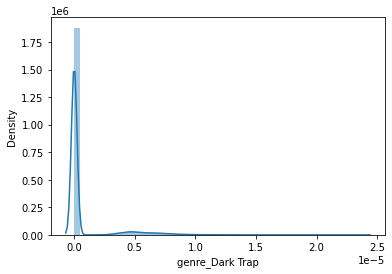

In [ ]:
sns.distplot(data_normal['genre_Dark Trap'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


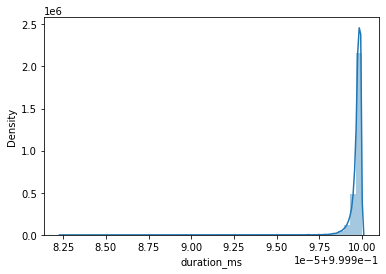

In [ ]:
sns.distplot(data_normal['duration_ms'])

#### **Scale**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_scaled = ss.fit_transform(data_cluster)
data_normal2 = normalize(data_scaled)
data_normal2 = pd.DataFrame(data_normal2,columns=data_cluster.columns)
data_normal2

danceability    energy       key  ...  genre_techno  genre_trance  genre_trap
0          0.269136  0.061604 -0.202202  ...     -0.060286     -0.060756   -0.060625
1          0.113108 -0.326143  0.159562  ...     -0.060968     -0.061444   -0.061311
2          0.256660  0.135464 -0.019273  ...     -0.052305     -0.052713   -0.052600
3         -0.182137  0.017558 -0.255778  ...     -0.047859     -0.048232   -0.048128
4          0.239542 -0.178205 -0.217406  ...     -0.064819     -0.065324   -0.065183
...             ...       ...       ...  ...           ...           ...         ...
42300     -0.167497 -0.089080 -0.088041  ...     -0.064562     -0.065066   -0.064926
42301     -0.174278  0.006655 -0.326746  ...     -0.061137     -0.061614   -0.061481
42302     -0.365720  0.065466  0.147598  ...     -0.056397     -0.056837   -0.056714
42303     -0.227204  0.188952  0.037647  ...     -0.060068     -0.060537   -0.060406
42304     -0.150062  0.211400  0.210838  ...     -0.058366     -0.058821   -0.058694

[42305 rows x 28 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


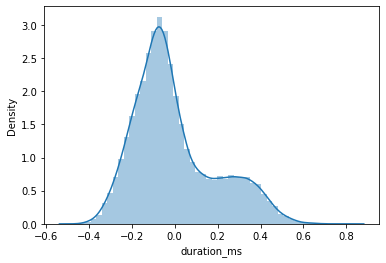

In [ ]:
sns.distplot(data_normal2['duration_ms'])

### **label encoding**

In [ ]:
data_cluster2 = data.drop(['type','id','uri','track_href','analysis_url','song_name','title'],axis=1)
data_cluster2

danceability  energy  key  ...  duration_ms  time_signature      genre
0             0.831   0.814    2  ...       124539               4  Dark Trap
1             0.719   0.493    8  ...       224427               4  Dark Trap
2             0.850   0.893    5  ...        98821               4  Dark Trap
3             0.476   0.781    0  ...       123661               3  Dark Trap
4             0.798   0.624    2  ...       123298               4  Dark Trap
...             ...     ...  ...  ...          ...             ...        ...
42300         0.528   0.693    4  ...       269208               4  hardstyle
42301         0.517   0.768    0  ...       210112               4  hardstyle
42302         0.361   0.821    8  ...       234823               4  hardstyle
42303         0.477   0.921    6  ...       323200               4  hardstyle
42304         0.529   0.945    9  ...       162161               4  hardstyle

[42305 rows x 14 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_cluster2["genre"] = labelencoder.fit_transform(data_cluster2["genre"])
data_cluster2

danceability  energy  key  ...  duration_ms  time_signature  genre
0             0.831   0.814    2  ...       124539               4      0
1             0.719   0.493    8  ...       224427               4      0
2             0.850   0.893    5  ...        98821               4      0
3             0.476   0.781    0  ...       123661               3      0
4             0.798   0.624    2  ...       123298               4      0
...             ...     ...  ...  ...          ...             ...    ...
42300         0.528   0.693    4  ...       269208               4      9
42301         0.517   0.768    0  ...       210112               4      9
42302         0.361   0.821    8  ...       234823               4      9
42303         0.477   0.921    6  ...       323200               4      9
42304         0.529   0.945    9  ...       162161               4      9

[42305 rows x 14 columns]

#### **Scale**

In [ ]:
data_scaled = ss.fit_transform(data_cluster2)
data_normal3 = normalize(data_scaled)
data_normal3 = pd.DataFrame(data_normal3,columns=data_cluster2.columns)
data_normal3

danceability    energy       key  ...  duration_ms  time_signature     genre
0          0.324152  0.074197 -0.243535  ...    -0.325048        0.027070 -0.442128
1          0.136933 -0.394842  0.193173  ...    -0.069155        0.027518 -0.449445
2          0.293223  0.154762 -0.022018  ...    -0.321972        0.022278 -0.363867
3         -0.203099  0.019579 -0.285216  ...    -0.240566       -0.705710 -0.324957
4          0.299220 -0.222601 -0.271569  ...    -0.366025        0.030186 -0.493021
...             ...       ...       ...  ...          ...             ...       ...
42300     -0.367037 -0.195203 -0.192926  ...     0.091959        0.052745  0.201289
42301     -0.323608  0.012358 -0.606719  ...    -0.163951        0.042324  0.161518
42302     -0.581268  0.104050  0.234590  ...    -0.050959        0.033418  0.127532
42303     -0.405049  0.336855  0.067115  ...     0.274499        0.039924  0.152361
42304     -0.252593  0.355843  0.354896  ...    -0.308831        0.036628  0.139781

[42305 rows x 14 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


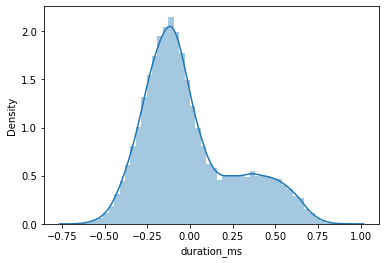

In [ ]:
sns.distplot(data_normal3['duration_ms'])

## **without genre**

In [ ]:
data_nogenre

danceability  energy  key  ...    tempo  duration_ms  time_signature
0             0.831   0.814    2  ...  156.985       124539               4
1             0.719   0.493    8  ...  115.080       224427               4
2             0.850   0.893    5  ...  218.050        98821               4
3             0.476   0.781    0  ...  186.948       123661               3
4             0.798   0.624    2  ...  147.988       123298               4
...             ...     ...  ...  ...      ...          ...             ...
42300         0.528   0.693    4  ...  150.013       269208               4
42301         0.517   0.768    0  ...  149.928       210112               4
42302         0.361   0.821    8  ...  154.935       234823               4
42303         0.477   0.921    6  ...  150.042       323200               4
42304         0.529   0.945    9  ...  155.047       162161               4

[42305 rows x 13 columns]

In [ ]:
data_normalized4 = normalize(data_nogenre)
data_normalized4 = pd.DataFrame(data_normalized4,columns=data_nogenre.columns)
data_normalized4

danceability    energy       key  ...     tempo  duration_ms  time_signature
0          0.000007  0.000007  0.000016  ...  0.001261     0.999999        0.000032
1          0.000003  0.000002  0.000036  ...  0.000513     1.000000        0.000018
2          0.000009  0.000009  0.000051  ...  0.002207     0.999998        0.000040
3          0.000004  0.000006  0.000000  ...  0.001512     0.999999        0.000024
4          0.000006  0.000005  0.000016  ...  0.001200     0.999999        0.000032
...             ...       ...       ...  ...       ...          ...             ...
42300      0.000002  0.000003  0.000015  ...  0.000557     1.000000        0.000015
42301      0.000002  0.000004  0.000000  ...  0.000714     1.000000        0.000019
42302      0.000002  0.000003  0.000034  ...  0.000660     1.000000        0.000017
42303      0.000001  0.000003  0.000019  ...  0.000464     1.000000        0.000012
42304      0.000003  0.000006  0.000056  ...  0.000956     1.000000        0.000025

[42305 rows x 13 columns]

In [ ]:
data_scaled4 = ss.fit_transform(data_nogenre)
data_normal4 = normalize(data_scaled4)
data_normal4 = pd.DataFrame(data_normal4,columns=data_nogenre.columns)
data_normal4

danceability    energy       key  ...     tempo  duration_ms  time_signature
0          0.361392  0.082721 -0.271514  ...  0.117808    -0.362392        0.030180
1          0.153288 -0.442000  0.216245  ... -0.409556    -0.077415        0.030805
2          0.314802  0.166151 -0.023638  ...  0.692806    -0.345667        0.023918
3         -0.214754  0.020703 -0.301583  ...  0.340834    -0.254371       -0.746208
4          0.343924 -0.255858 -0.312142  ...  0.007319    -0.420710        0.034696
...             ...       ...       ...  ...       ...          ...             ...
42300     -0.374707 -0.199281 -0.196957  ...  0.056111     0.093881        0.053847
42301     -0.327913  0.012522 -0.614791  ...  0.043193    -0.166132        0.042887
42302     -0.586054  0.104907  0.236521  ...  0.103173    -0.051379        0.033693
42303     -0.409834  0.340834  0.067908  ...  0.042575     0.277742        0.040396
42304     -0.255098  0.359371  0.358414  ...  0.114972    -0.311893        0.036991

[42305 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [ ]:
data_minmax4 = minmax.fit_transform(data_nogenre)
data_minmax4 = pd.DataFrame(data_minmax4,columns=data_nogenre.columns)
data_minmax4

danceability    energy       key  ...     tempo  duration_ms  time_signature
0          0.829884  0.813955  0.181818  ...  0.610006     0.111487            0.75
1          0.708527  0.492877  0.727273  ...  0.351848     0.224043            0.75
2          0.850471  0.892974  0.454545  ...  0.986200     0.082507            0.75
3          0.445227  0.780947  0.000000  ...  0.794595     0.110497            0.50
4          0.794127  0.623909  0.181818  ...  0.554579     0.110088            0.75
...             ...       ...       ...  ...       ...          ...             ...
42300      0.501571  0.692925  0.363636  ...  0.567055     0.274503            0.75
42301      0.489652  0.767944  0.000000  ...  0.566531     0.207912            0.75
42302      0.320620  0.820956  0.727273  ...  0.597377     0.235757            0.75
42303      0.446311  0.920981  0.545455  ...  0.567233     0.335342            0.75
42304      0.502655  0.944987  0.818182  ...  0.598067     0.153880            0.75

[42305 rows x 13 columns]

# **Cluster**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
import pickle

In [ ]:
tsne = TSNE()

## **K-Means**

### **K-Means With Genre**

#### **K-Means with one hot coding**

In [ ]:
avg = []
for i in range (3,25):
  cluster = KMeans(n_clusters=i,random_state = 42).fit_predict(data_normal2)
  avg.append(silhouette_score(data_normal2, cluster))

In [ ]:
for i in range (len(avg)):
  if avg[i]==max(avg):
    print (i+3)

15


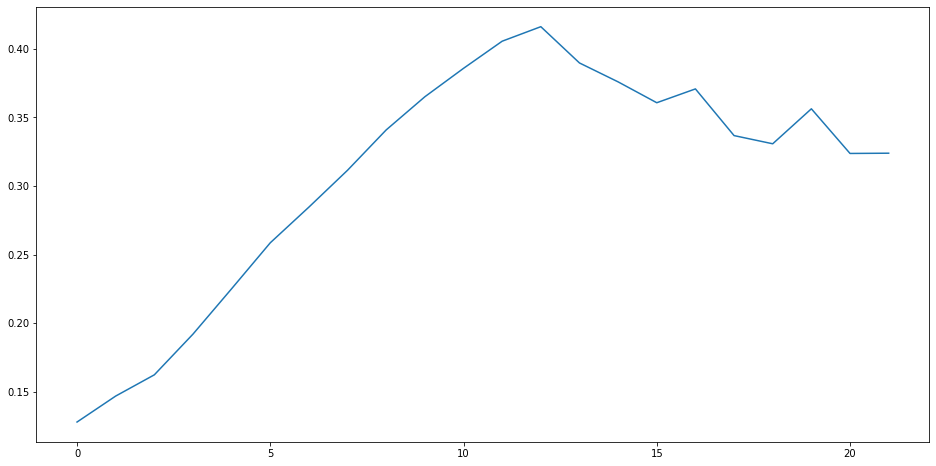

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(avg)

Text(0.5, 1.0, 'kmeans')

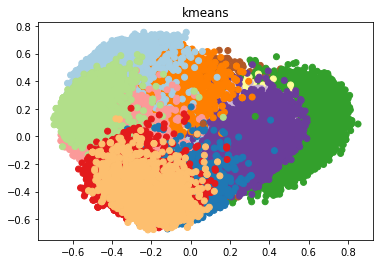

In [ ]:
cluster = KMeans(n_clusters=15,random_state = 42).fit(data_normal2)
pca = PCA(n_components = 2)
X = pca.fit_transform(data_normal2)
pred = cluster.fit_predict(data_normal2)
plt.scatter(X[:,0], X[:,1],c=pred, cmap='Paired')
plt.title("kmeans")

Text(0.5, 0.92, 'kmeans')

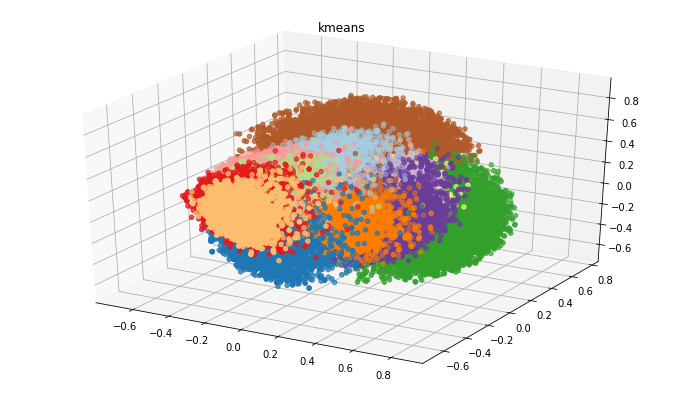

In [ ]:
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normal2)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')
plt.title("kmeans")

##### **Lables**

In [ ]:
labels = clustering.labels_
data_kmeans = data.copy()
data_kmeans['cluster'] = labels
data_kmeans

danceability  energy  ...                        title  cluster
0             0.831   0.814  ...                          NaN       14
1             0.719   0.493  ...                          NaN       14
2             0.850   0.893  ...                          NaN       14
3             0.476   0.781  ...                          NaN       14
4             0.798   0.624  ...                          NaN       14
...             ...     ...  ...                          ...      ...
42300         0.528   0.693  ...           Euphoric Hardstyle        8
42301         0.517   0.768  ...  Greatest Hardstyle Playlist        8
42302         0.361   0.821  ...       Best of Hardstyle 2020        8
42303         0.477   0.921  ...           Euphoric Hardstyle        8
42304         0.529   0.945  ...       Best of Hardstyle 2020        8

[42305 rows x 22 columns]

In [ ]:
temp = data_kmeans['cluster']==14
cs = data_kmeans[temp]
cs

danceability  energy  ...                     title  cluster
0             0.831   0.814  ...                       NaN       14
1             0.719   0.493  ...                       NaN       14
2             0.850   0.893  ...                       NaN       14
3             0.476   0.781  ...                       NaN       14
4             0.798   0.624  ...                       NaN       14
...             ...     ...  ...                       ...      ...
4574          0.367   0.769  ...                       NaN       14
4575          0.587   0.530  ...                       NaN       14
4576          0.713   0.358  ...                       NaN       14
4577          0.734   0.628  ...                       NaN       14
36027         0.182   0.205  ...  I'm a fucking Headbanger       14

[4579 rows x 22 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


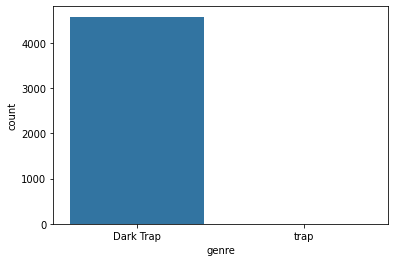

In [ ]:
sns.countplot(cs['genre'])

In [ ]:
cs['genre'].value_counts()

Dark Trap    4578
trap            1
Name: genre, dtype: int64

#### **Kmeans - with label encoding**

In [ ]:
avg = []
for i in range (3,25):
  cluster = KMeans(n_clusters=i,random_state = 42).fit_predict(data_normal3)
  avg.append(silhouette_score(data_normal3, cluster))

In [ ]:
avg

[0.15724231829276375,
 0.13557454773146024,
 0.13018834110979846,
 0.12977873609576188,
 0.11294607275379696,
 0.11461191317595731,
 0.11329897959743948,
 0.11699035150881706,
 0.11796310702444114,
 0.12361797812686318,
 0.12383256693522951,
 0.12138956440583738,
 0.12597883299551205,
 0.12790251656777962,
 0.12641437060885094,
 0.12717770512369125,
 0.12751840559657837,
 0.12135541921671118,
 0.12616859703961666,
 0.12441145072423813,
 0.12268916714155029,
 0.12420962881675617]

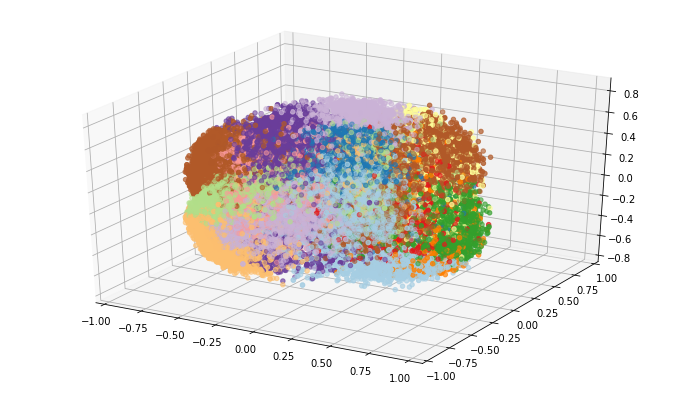

In [ ]:
cluster = KMeans(n_clusters=25,random_state = 42).fit(data_normal3)
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normal3)
pred = cluster.fit_predict(data_normal3)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

### **K-Means Without Genre**

#### **Standard Scale and Normalize**

In [ ]:
avg = []
for i in range (3,25):
  cluster = KMeans(n_clusters=i,random_state = 42).fit_predict(data_normal4)
  avg.append(silhouette_score(data_normal4, cluster))

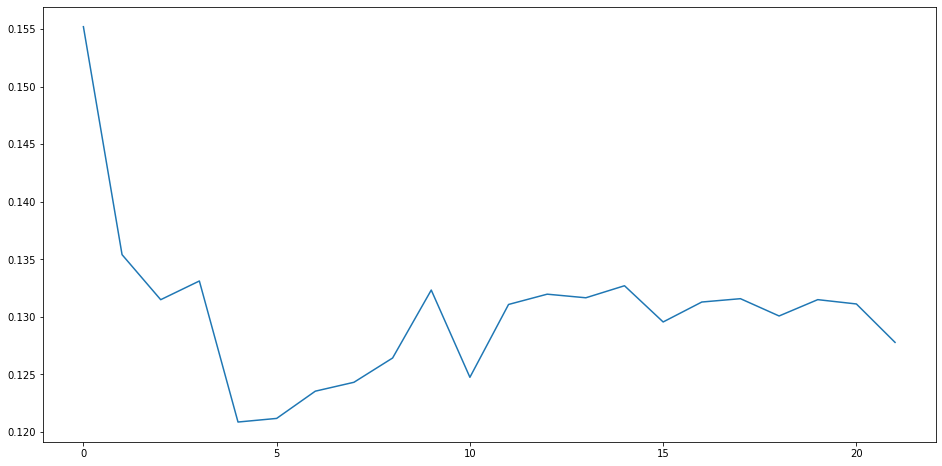

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(avg)

In [ ]:
for i in range (len(avg)):
  if avg[i]==max(avg):
    print (i+3)

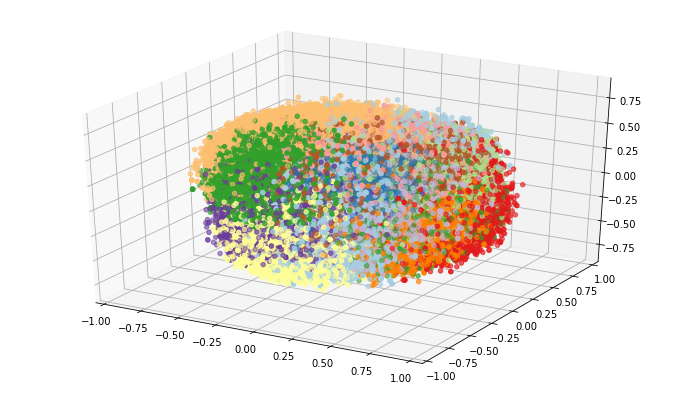

In [ ]:
cluster = KMeans(n_clusters=17,random_state = 42).fit(data_normal4)
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normal4)
pred = cluster.fit_predict(data_normal4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

In [ ]:
x = tsne.fit_transform(data_normal4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


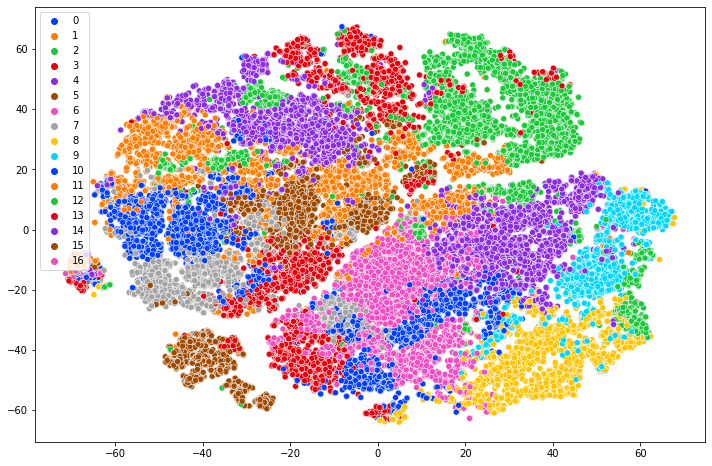

In [ ]:
palette = sns.color_palette("bright", 17)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0], x[:,1], hue=pred, legend='full', palette=palette)

#### **Standard Scaling**

In [ ]:
avg = []
for i in range (10,30):
  cluster = KMeans(n_clusters=i,random_state = 42).fit_predict(data_scaled4)
  avg.append(silhouette_score(data_scaled4, cluster))

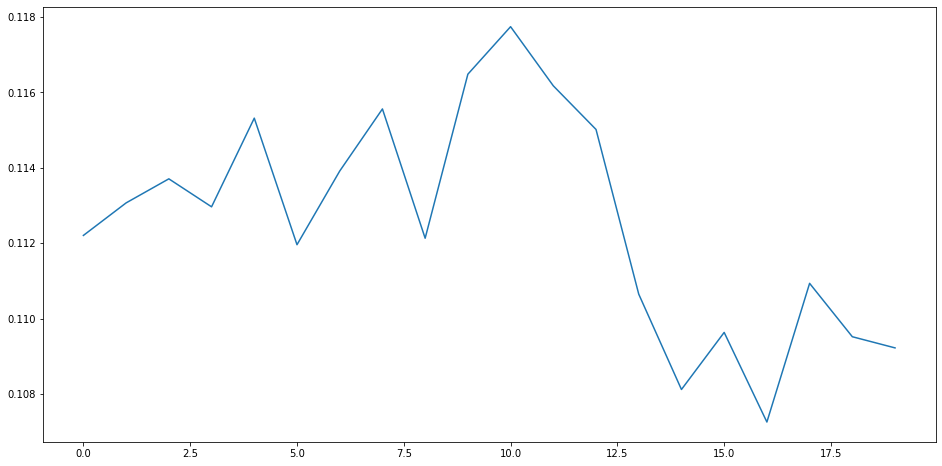

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(avg)

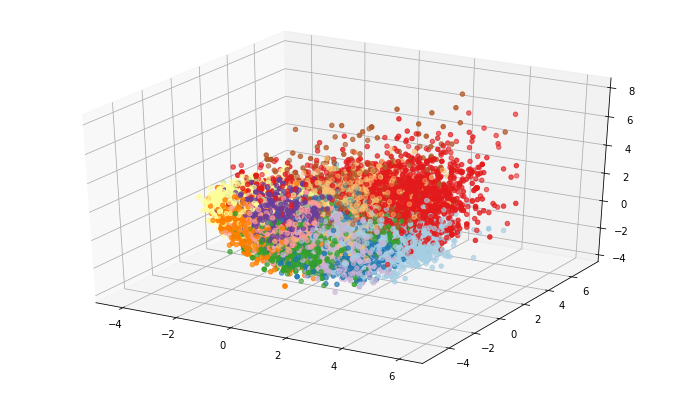

In [ ]:
cluster = KMeans(n_clusters=20,random_state = 42).fit(data_scaled4)
pca = PCA(n_components = 3)
X = pca.fit_transform(data_scaled4)
pred = cluster.fit_predict(data_scaled4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

In [ ]:
x = tsne.fit_transform(data_scaled4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


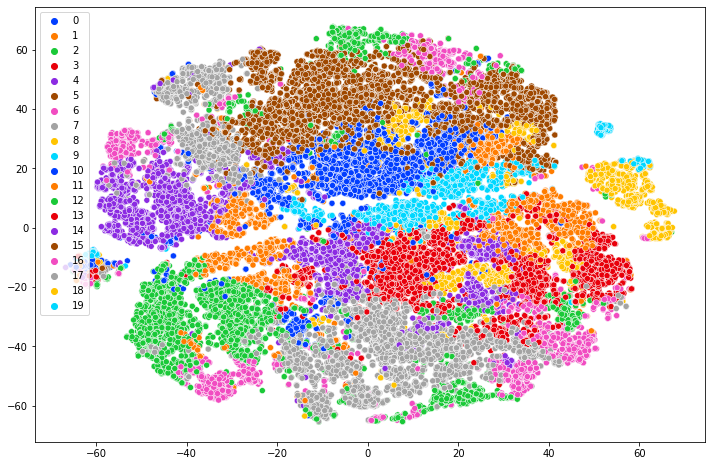

In [ ]:
palette = sns.color_palette("bright", 20)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0], x[:,1], hue=pred, legend='full', palette=palette)

#### **Normalized**

In [ ]:
avg = []
for i in range (10,30):
  cluster = KMeans(n_clusters=i,random_state = 42).fit_predict(data_normalized4)
  avg.append(silhouette_score(data_normalized4, cluster))

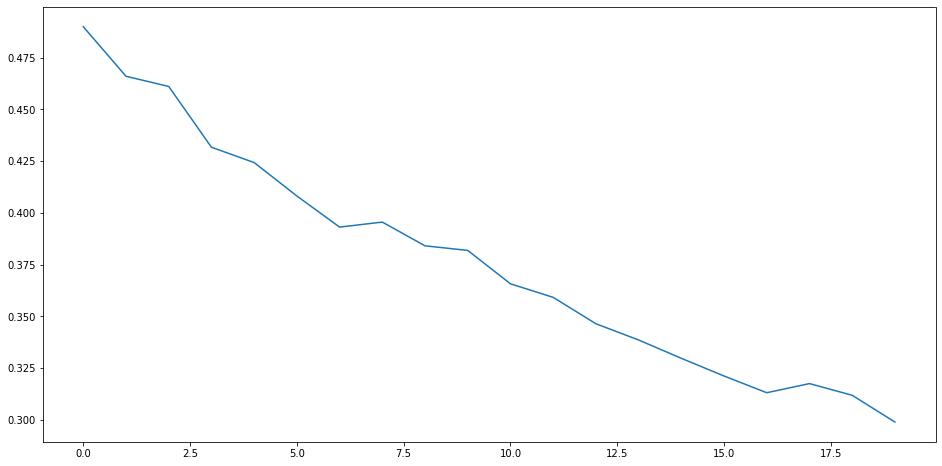

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(avg)

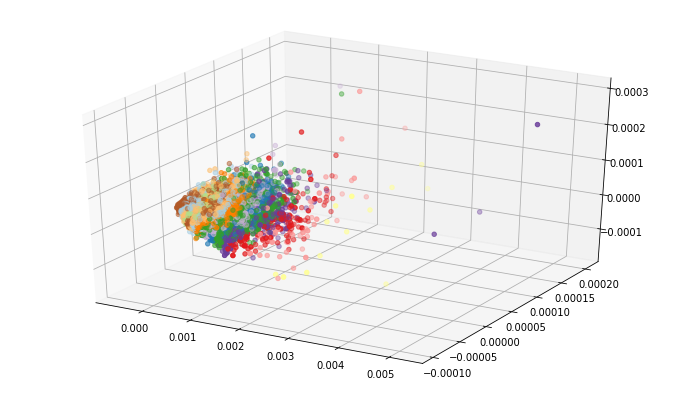

In [ ]:
cluster = KMeans(n_clusters=17,random_state = 42).fit(data_normalized4)
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normalized4)
pred = cluster.fit_predict(data_normalized4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

In [ ]:
labels = cluster.labels_
data['cluster'] = labels
data

danceability  energy  ...                        title  cluster
0             0.831   0.814  ...                          NaN        2
1             0.719   0.493  ...                          NaN        3
2             0.850   0.893  ...                          NaN        7
3             0.476   0.781  ...                          NaN        4
4             0.798   0.624  ...                          NaN       11
...             ...     ...  ...                          ...      ...
42300         0.528   0.693  ...           Euphoric Hardstyle        3
42301         0.517   0.768  ...  Greatest Hardstyle Playlist        9
42302         0.361   0.821  ...       Best of Hardstyle 2020       16
42303         0.477   0.921  ...           Euphoric Hardstyle        8
42304         0.529   0.945  ...       Best of Hardstyle 2020        5

[42305 rows x 22 columns]

In [ ]:
data.to_csv(r'/content/dataset.csv', index = False, header=True)

In [ ]:
pickle.dump(cluster, open("model.pkl", "wb"))

In [ ]:
x = tsne.fit_transform(data_normalized4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


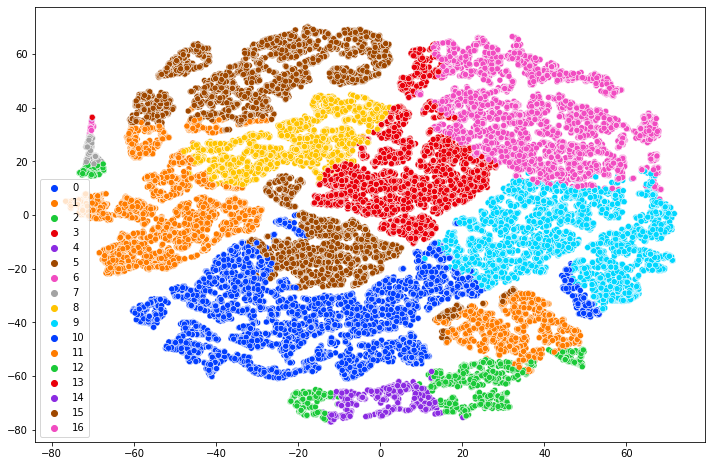

In [ ]:
palette = sns.color_palette("bright", 17)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0], x[:,1], hue=pred, legend='full', palette=palette)

#### **Min Max scaling**

In [ ]:
avg = []
for i in range (10,30):
  cluster = KMeans(n_clusters=i,random_state = 42).fit_predict(data_minmax4)
  avg.append(silhouette_score(data_minmax4, cluster))

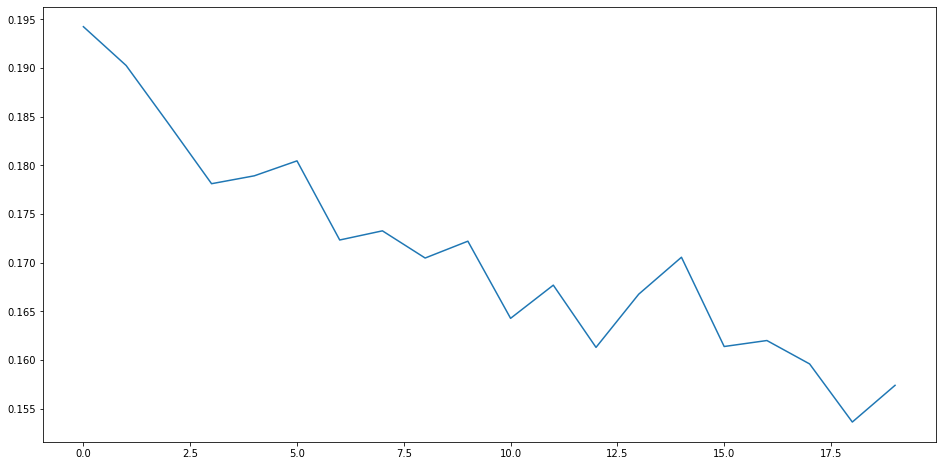

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(avg)

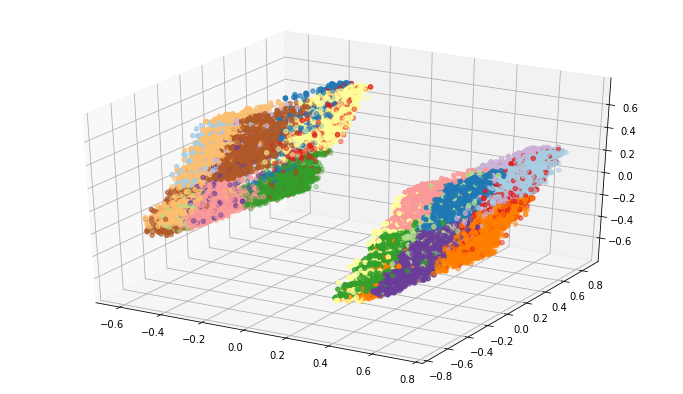

In [ ]:
cluster = KMeans(n_clusters=24,random_state = 42).fit(data_minmax4)
pca = PCA(n_components = 3)
X = pca.fit_transform(data_minmax4)
pred = cluster.fit_predict(data_minmax4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

In [ ]:
x = tsne.fit_transform(data_minmax4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


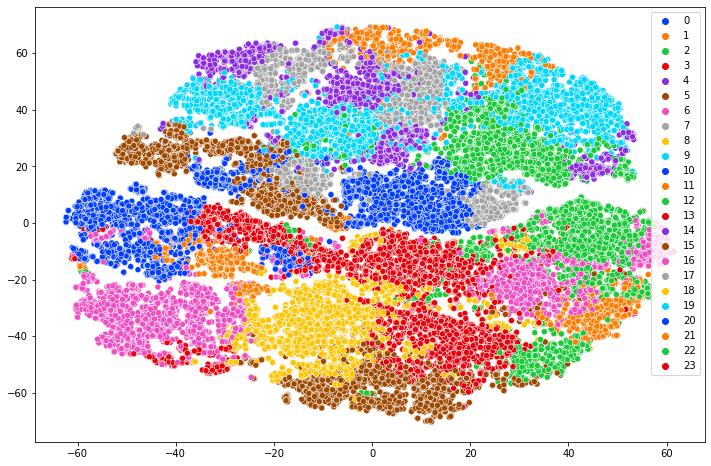

In [ ]:
palette = sns.color_palette("bright", 24)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0], x[:,1], hue=pred, legend='full', palette=palette)

## **DBSCAN**

In [ ]:
eps = []
for i in range (6):
    cluster = DBSCAN(eps=0.01*(pow(2,i)),min_samples=5).fit_predict(data_normal2)
    eps.append(silhouette_score(data_normal2, cluster))

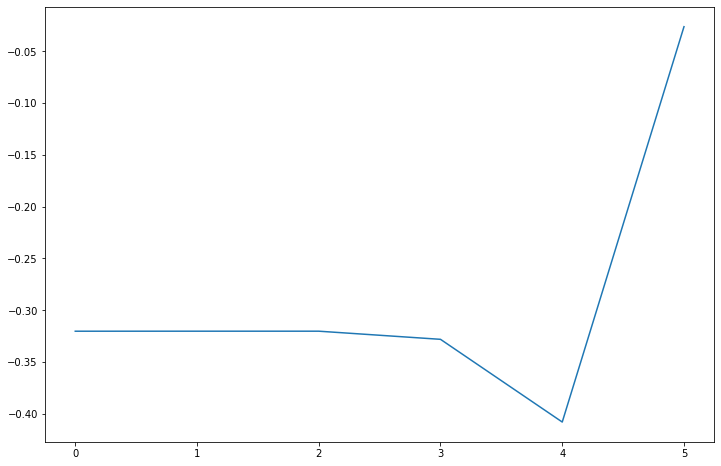

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(eps)

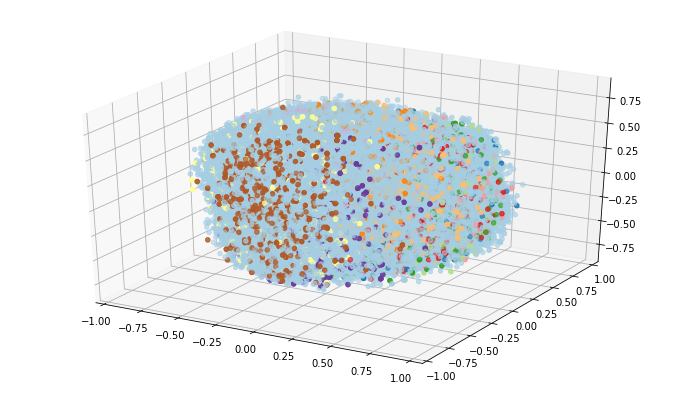

In [ ]:
dbscan = DBSCAN(eps=0.01, min_samples=2)
dbscan.fit(data_normal4)
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normal4)
pred = dbscan.fit_predict(data_normal4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

In [ ]:
labels = db.labels_
data_dbscan = data.copy()
data_dbscan['cluster'] = labels
data_dbscan

danceability  energy  ...                        title  cluster
0             0.831   0.814  ...                          NaN        0
1             0.719   0.493  ...                          NaN        0
2             0.850   0.893  ...                          NaN       -1
3             0.476   0.781  ...                          NaN        1
4             0.798   0.624  ...                          NaN        0
...             ...     ...  ...                          ...      ...
42300         0.528   0.693  ...           Euphoric Hardstyle       48
42301         0.517   0.768  ...  Greatest Hardstyle Playlist       48
42302         0.361   0.821  ...       Best of Hardstyle 2020       48
42303         0.477   0.921  ...           Euphoric Hardstyle       48
42304         0.529   0.945  ...       Best of Hardstyle 2020       48

[42305 rows x 22 columns]

## **HDBSCAN**

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 16.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311925 sha256=83b3b3371c2cbd4d53bd4333de77408278c41b8d18ed925a2e8b545d426139dd
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(metric='manhattan',min_cluster_size=25)
cluster.fit(data_normalized4)

HDBSCAN(metric='manhattan', min_cluster_size=25)

In [ ]:
np.unique(cluster.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

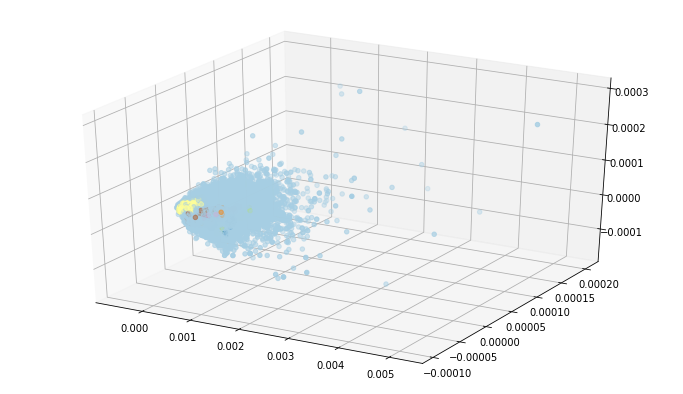

In [ ]:
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normalized4)
pred = cluster.fit_predict(data_normalized4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

In [ ]:
x = tsne.fit_transform(data_normalized4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


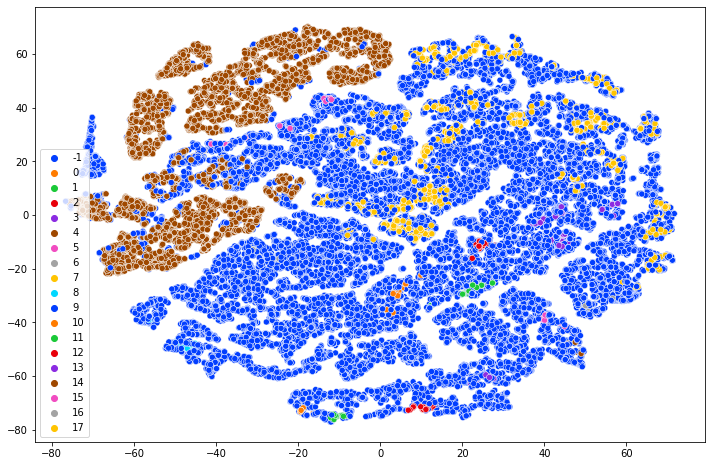

In [ ]:
palette = sns.color_palette("bright", 19)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0], x[:,1], hue=pred, legend='full', palette=palette)

## **Hierarchical**

In [ ]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='manhattan', linkage='single')

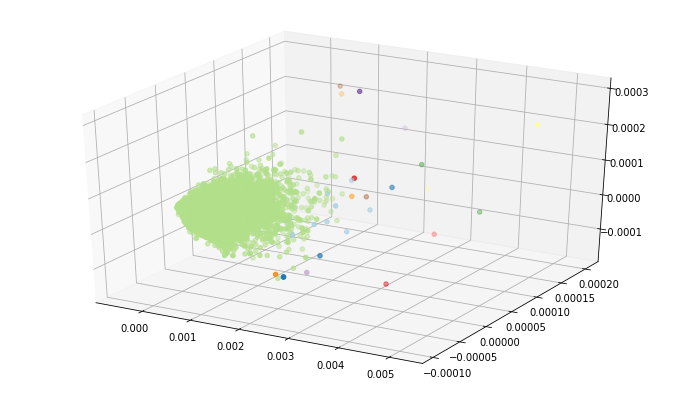

In [ ]:
pca = PCA(n_components = 3)
X = pca.fit_transform(data_normalized4)
pred = cluster.fit_predict(data_normalized4)
plt.figure(figsize=(12,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1],X[:,2],c=pred, cmap='Paired')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


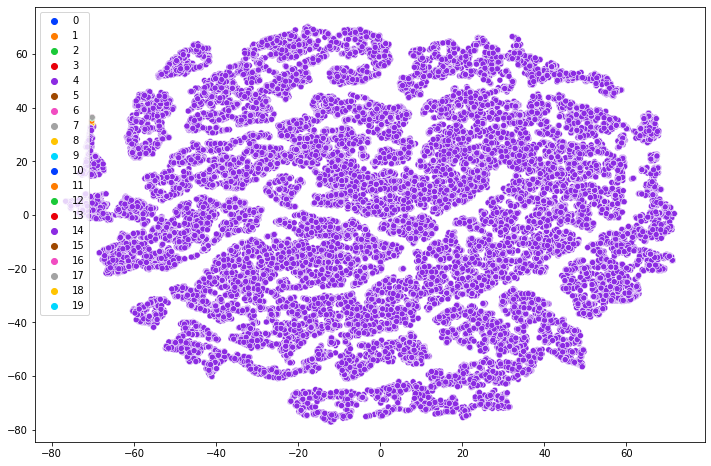

In [ ]:
palette = sns.color_palette("bright", 20)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0], x[:,1], hue=pred, legend='full', palette=palette)

# **Playlist**

In [ ]:
import requests
import json
import pandas

In [ ]:
TOKEN = "BQDH12yd-rIvpqEuL5q6Ua0jdWNx7WDjm8Aoma1rTCQYVo9zD6JszO8AaYlM8t7HbDIAvdv7tcGck0JbfNX_v9HYuzcc8N_rj5uWKvv47uuHb-l_O9wy_iwz44dKdlcuSln1vI0GyN4vaMmUAxMur_OUv-N1fVQ"

In [ ]:
def get_playlist_tracks(playlist_id, sample, TOKEN):
    """
    Returns a list of tracks from a playlist
    """
    url = "https://api.spotify.com/v1/playlists/"+playlist_id
    headers = {"Accept": "application/json", "Content-Type": "application/json" ,'Authorization': "Bearer {}".format(TOKEN)}
    r = requests.get(url, headers=headers)
    r = r.json()

    response_df = pandas.json_normalize(r['tracks']["items"])
    response_df.shape

    requested_tracks = ""

    for i in response_df.sample(sample)['track.id'].to_list():
        requested_tracks += i + ","

    return requested_tracks

In [ ]:
def get_audio_features(track_id_list, TOKEN):
    """
    Returns a list of audio features for a list of tracks
    """

    url = "https://api.spotify.com/v1/audio-features/?ids=" + track_id_list
    headers = {"Accept": "application/json", "Content-Type": "application/json" ,'Authorization': "Bearer {}".format(TOKEN)}
    r = requests.get(url, headers=headers)
    r = r.json()
    response_df = pandas.json_normalize(r['audio_features'])
    return response_df

In [ ]:
# number tracks to get
sample = 20

# playlist id
playlist_id = "3UsVJgu7XJkP50pgOn5Hh9"

# get tracks from playlist
req_tracks = get_playlist_tracks(playlist_id, sample, TOKEN)
# get audio features for tracks
mix = get_audio_features(req_tracks, TOKEN)


In [ ]:
mix

danceability  energy  ...  duration_ms  time_signature
0          0.352   0.725  ...       237640               4
1          0.549   0.426  ...       300558               4
2          0.587   0.302  ...       278441               4
3          0.350   0.828  ...       318587               4
4          0.562   0.847  ...       242787               4
5          0.645   0.448  ...       246696               4
6          0.421   0.517  ...       272107               4
7          0.629   0.578  ...       295867               4
8          0.515   0.430  ...       238640               4
9          0.829   0.749  ...       240115               4
10         0.547   0.394  ...       388733               3
11         0.550   0.512  ...       286453               3
12         0.179   0.912  ...       231533               3
13         0.488   0.454  ...       253853               4
14         0.397   0.386  ...       355400               4
15         0.246   0.276  ...       191425               4
16         0.534   0.437  ...       334237               3
17         0.120   0.336  ...       288733               4
18         0.479   0.873  ...       301453               4
19         0.420   0.340  ...       223000               4

[20 rows x 18 columns]

In [ ]:
mix1 = mix.drop(['type','id','uri','track_href','analysis_url'],axis=1)
mix1

danceability  energy  key  ...    tempo  duration_ms  time_signature
0          0.352   0.725    8  ...  189.767       237640               4
1          0.549   0.426    7  ...  147.772       300558               4
2          0.587   0.302    0  ...  112.460       278441               4
3          0.350   0.828    6  ...  105.435       318587               4
4          0.562   0.847    1  ...  100.008       242787               4
5          0.645   0.448    9  ...  112.012       246696               4
6          0.421   0.517   11  ...   84.011       272107               4
7          0.629   0.578    4  ...  119.071       295867               4
8          0.515   0.430    7  ...   91.844       238640               4
9          0.829   0.749    1  ...  130.043       240115               4
10         0.547   0.394    4  ...  142.370       388733               3
11         0.550   0.512    0  ...   97.525       286453               3
12         0.179   0.912    4  ...  182.990       231533               3
13         0.488   0.454    4  ...  138.076       253853               4
14         0.397   0.386    0  ...  144.242       355400               4
15         0.246   0.276    9  ...   80.457       191425               4
16         0.534   0.437    5  ...  178.384       334237               3
17         0.120   0.336   11  ...   72.640       288733               4
18         0.479   0.873    1  ...  116.710       301453               4
19         0.420   0.340   10  ...   72.835       223000               4

[20 rows x 13 columns]

In [ ]:
mix_normal = normalize(mix1)
mix_normal = pd.DataFrame(mix_normal,columns=mix1.columns)
mix_normal

danceability    energy       key  ...     tempo  duration_ms  time_signature
0   1.481232e-06  0.000003  0.000034  ...  0.000799          1.0        0.000017
1   1.826602e-06  0.000001  0.000023  ...  0.000492          1.0        0.000013
2   2.108166e-06  0.000001  0.000000  ...  0.000404          1.0        0.000014
3   1.098601e-06  0.000003  0.000019  ...  0.000331          1.0        0.000013
4   2.314786e-06  0.000003  0.000004  ...  0.000412          1.0        0.000016
5   2.614554e-06  0.000002  0.000036  ...  0.000454          1.0        0.000016
6   1.547185e-06  0.000002  0.000040  ...  0.000309          1.0        0.000015
7   2.125955e-06  0.000002  0.000014  ...  0.000402          1.0        0.000014
8   2.158062e-06  0.000002  0.000029  ...  0.000385          1.0        0.000017
9   3.452512e-06  0.000003  0.000004  ...  0.000542          1.0        0.000017
10  1.407135e-06  0.000001  0.000010  ...  0.000366          1.0        0.000008
11  1.920036e-06  0.000002  0.000000  ...  0.000340          1.0        0.000010
12  7.731077e-07  0.000004  0.000017  ...  0.000790          1.0        0.000013
13  1.922372e-06  0.000002  0.000016  ...  0.000544          1.0        0.000016
14  1.117051e-06  0.000001  0.000000  ...  0.000406          1.0        0.000011
15  1.285098e-06  0.000001  0.000047  ...  0.000420          1.0        0.000021
16  1.597668e-06  0.000001  0.000015  ...  0.000534          1.0        0.000009
17  4.156089e-07  0.000001  0.000038  ...  0.000252          1.0        0.000014
18  1.588971e-06  0.000003  0.000003  ...  0.000387          1.0        0.000013
19  1.883408e-06  0.000002  0.000045  ...  0.000327          1.0        0.000018

[20 rows x 13 columns]

In [ ]:
mix_normal.to_csv(r'/content/input_playlist.csv', index = False, header=True)